<a class="anchor" id="0"></a>
# **KNN Classification with the Iris Dataset**


Welcome to this beginner-friendly notebook on classification using the Iris dataset. We'll walk through the following steps:

1. Loading the dataset
2. Exploring and visualizing the data
3. Preparing the data for modeling
4. Building and evaluating a classification model

Let's get started!

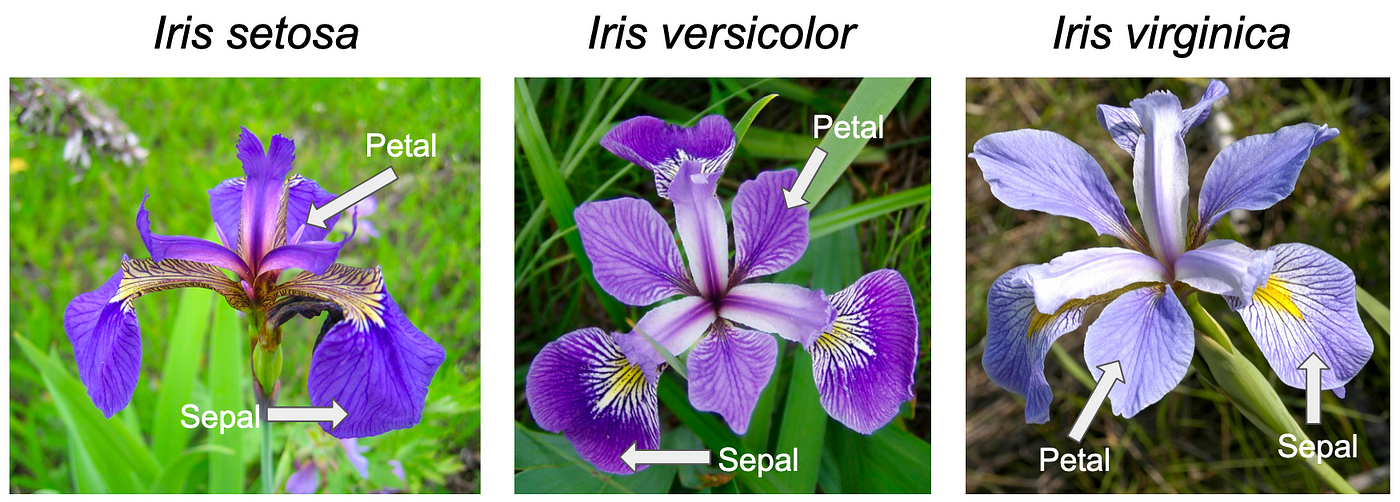

# **Import libraries** <a class="anchor" id="6"></a>


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# **Loading the Iris Dataset** <a class="anchor" id="7"></a>




In [ ]:
# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')

# Display the first 5 rows of the dataset
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


# **Exploring the Dataset** <a class="anchor" id="7"></a>



In [ ]:
# Checking for null values
print("Null values in the dataset:")
print(iris.isnull().sum())

# Basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(iris.describe())

# Checking the distribution of the target variable
print("\nDistribution of species:")
print(iris['species'].value_counts())

Null values in the dataset:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Basic statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Distribution of species:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# **Visualizing the Data** <a class="anchor" id="7"></a>

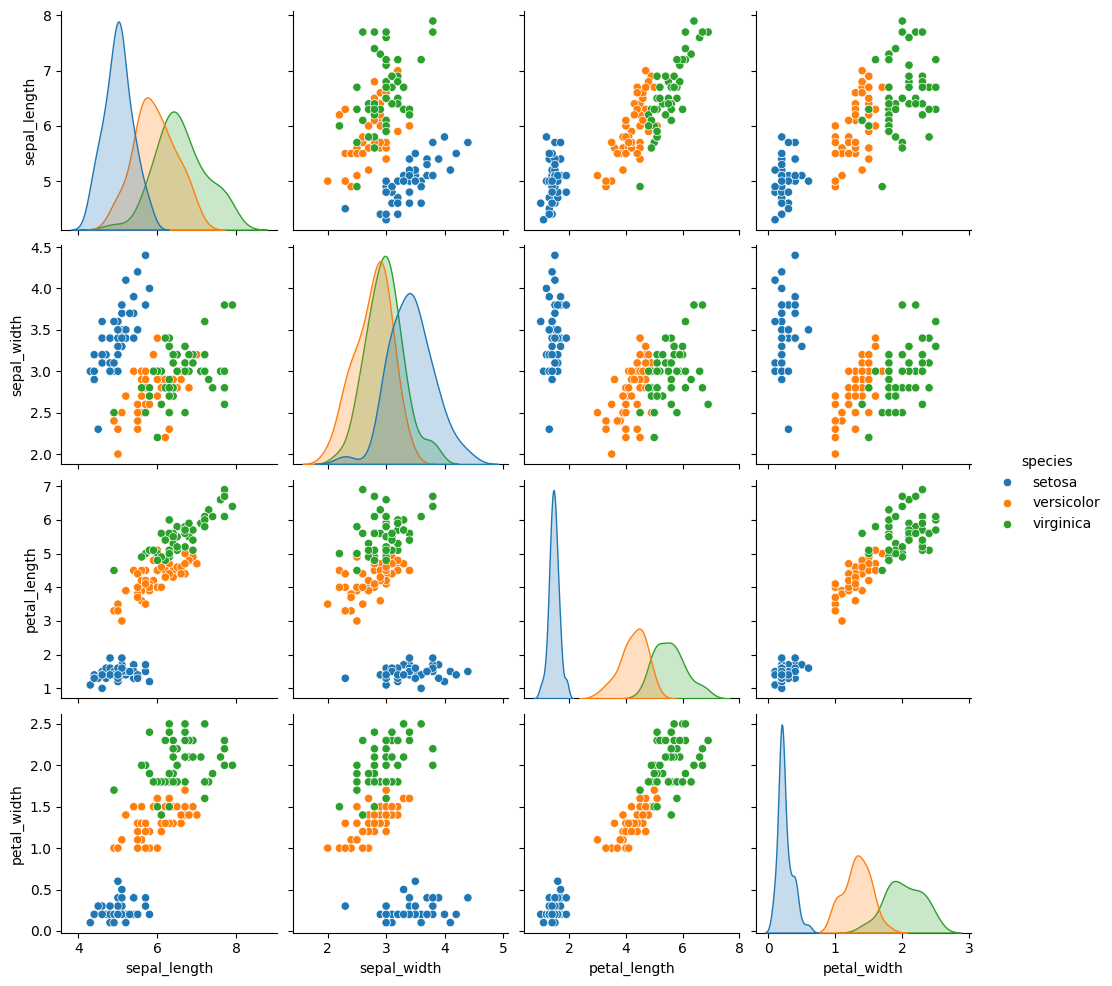

In [ ]:
# Pairplot of the dataset to visualize relationships between features. Showing every feature against every other feature
sns.pairplot(iris, hue='species') # color the points based on their species (class label)
plt.show()

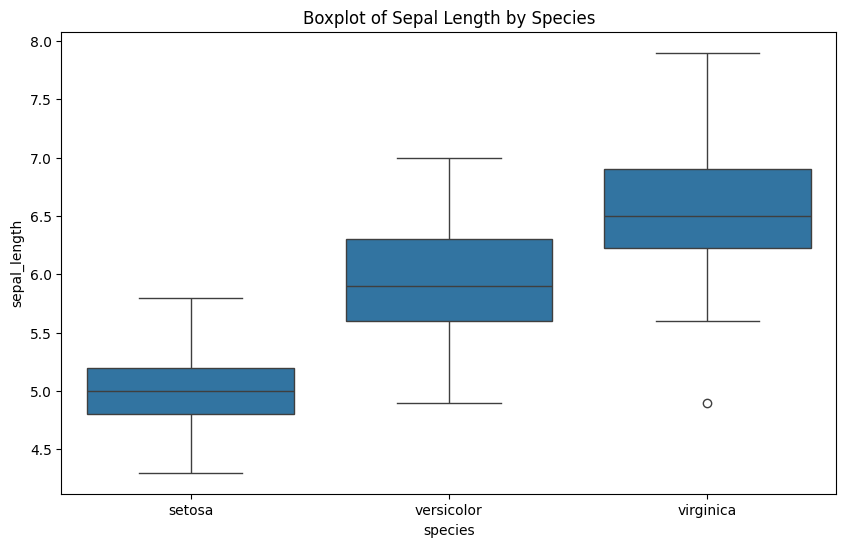

In [ ]:
# Boxplot to visualize the distribution of each feature by species
plt.figure(figsize=(10, 6))
sns.boxplot(x='species', y='sepal_length', data=iris)
plt.title('Boxplot of Sepal Length by Species')
plt.show()

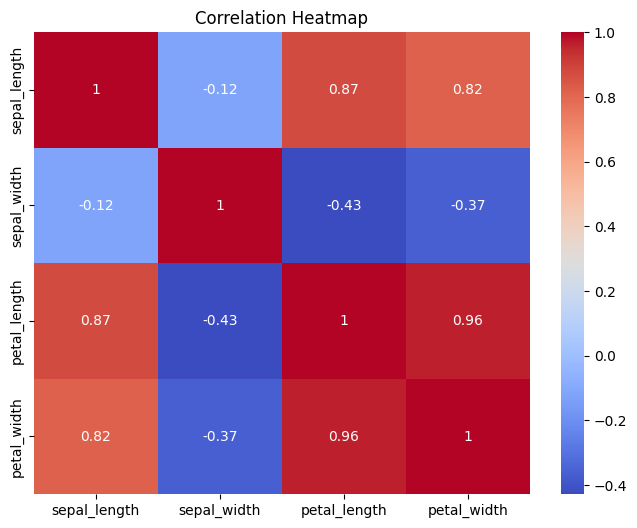

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris.drop(columns='species').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Preparing the Data for Modeling** <a class="anchor" id="8"></a>



In [ ]:
# Splitting the data into features (X) and target (y)
X = iris.drop(columns='species')
y = iris['species']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Building the Classification Model** <a class="anchor" id="8"></a>


In [ ]:
# Using K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model on the training data
knn.fit(X_train, y_train)

# Making predictions on the test data
y_pred = knn.predict(X_test)

In [ ]:
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


In [ ]:
# Displaying the predicted outputs
print("Predicted class labels for the test set:")
print(pd.DataFrame(y_pred, columns=['Predicted Class']).head(10))  # Show the first 10 predictions

Predicted class labels for the test set:
  Predicted Class
0      versicolor
1          setosa
2       virginica
3      versicolor
4      versicolor
5          setosa
6      versicolor
7       virginica
8      versicolor
9      versicolor


# **Evaluating the Model** <a class="anchor" id="8"></a>


Accuracy: 1.00


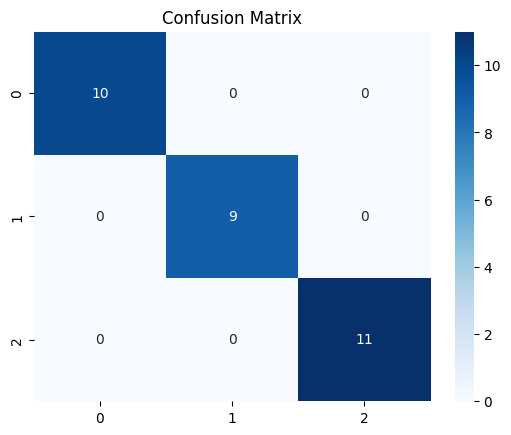

In [ ]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


# **Conclusion** <a class="anchor" id="8"></a>


In this notebook, we worked through a basic classification task using the Iris dataset, a classic dataset in machine learning. Here's a summary of what we did:

1. **Loaded the Dataset**: We began by loading the Iris dataset and examining its structure and contents.
2. **Explored the Data**: We performed exploratory data analysis (EDA) to understand the relationships between different features and the distribution of the species.
3. **Visualized the Data**: Through various plots, such as pair plots, box plots, and correlation heatmaps, we visualized the dataset to gain deeper insights into the data.
4. **Prepared the Data**: We split the data into training and testing sets and standardized the features to prepare the data for modeling.
5. **Built a Classification Model**: We used the K-Nearest Neighbors (KNN) algorithm to build a simple classification model. KNN is easy to understand and effective for small datasets like Iris.
6. **Evaluated the Model**: The model was evaluated using accuracy, confusion matrix, and a classification report, showing that the KNN classifier performed well on the Iris dataset.


**Key Takeaways:**
- The Iris dataset is a great starting point for learning about classification because of its simplicity and well-separated classes.
- Visualization techniques are powerful tools to understand the underlying patterns in the data.
- The K-Nearest Neighbors (KNN) algorithm is a straightforward yet effective method for classification tasks, especially when dealing with smaller datasets.



**Next Steps:**
- Experiment with other classification algorithms such as Decision Trees, Random Forests, or Support Vector Machines (SVM) to see how they compare to KNN.
- Try hyperparameter tuning, such as adjusting the number of neighbors in KNN, to potentially improve the model's performance.
- Explore feature importance and consider feature selection to simplify the model and improve interpretability.

This notebook serves as a foundation for more advanced topics in machine learning. Continue building on this knowledge by exploring more complex datasets and models.

In [ ]:
print("Thank You\nTeam IK")